In [ ]:
# CS156 (Introduction to AI), Fall 2021
# Term Project Report
# Roster Name: Nand Kishore Khuswaha
# Student ID: 013920192
# Email address: nandkishore.khuswaha@sjsu.edu


In [ ]:
# References and sources:
# 1) Regression.Boston.ipynb (class file)
# 2) Train_validation_test_Iris.ipynb
# 3) importing datafile into google colab : https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory


In [ ]:
# Project description/introduction text (the background information) 

# Happiness is an important part of our well being. There are many 
# factors that contributes to Happiness. We will closely looks at 
# these factors and determine the roles they play in determining 
# the happiness score of a given country. I will use several machine
# learning algorithms to predict happiness score of various countries.
# This is an interesting problem to solve because it gives us some 
# insights into major factors that contributes to happiness of people.
# Most of the data are numeric and we will be deadling with a regression 
# problem. 





In [ ]:
# Machine learning algorithm selected for this project 

# LinerRegression: LinearRegression fits a linear model with coefficients
# w = (w1, …, wp) to minimize the residual sum of squares between the 
# observed targets in the dataset, and the targets predicted by the linear approximation.

# RandomForestRegressor: RFs train each tree independently, using a 
# random sample of the data. This randomness helps to make the model 
# more robust than a single decision tree, and less likely to overfit
# on the training data [1,2].

# GradientBoostingRegressor GBT build trees one at a time, where each
# new tree helps to correct errors made by previously trained tree.


In [ ]:
# Dataset source 

# Kaggle Dataset:  https://www.kaggle.com/unsdsn/world-happiness 
# Download 2019.csv file


In [ ]:
# Solution:

In [66]:
import numpy as np
from google.colab import files

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
np.random.seed(42)

In [68]:
uploaded = files.upload()
print(uploaded)


Saving happiness_2019.csv to happiness_2019 (1).csv
{'happiness_2019.csv': b'Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption\r\n1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393\r\n2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410\r\n3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341\r\n4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118\r\n5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298\r\n6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343\r\n7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373\r\n8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380\r\n9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308\r\n10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226\r\n11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290\r\n12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093\r\n13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082\r\n14,Luxembourg,7.090,1.609,1.479

In [69]:
df = pd.read_csv(io.BytesIO(uploaded['happiness_2019.csv']))
df = df.drop('Overall rank', 1)
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [70]:
# checking if data contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [71]:
X= df.loc[ : ,df.columns.difference(['id','Overall rank','Country or region'])]
Y = df['Score']
class_names = ['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices',
          'Generosity','Perceptions of corruption']
X.head()
# Y.head()

,Freedom to make life choices,GDP per capita,Generosity,Healthy life expectancy,Perceptions of corruption,Score,Social support
0,0.596,1.340,0.153,0.986,0.393,7.769,1.587
1,0.592,1.383,0.252,0.996,0.410,7.600,1.573
2,0.603,1.488,0.271,1.028,0.341,7.554,1.582
3,0.591,1.380,0.354,1.026,0.118,7.494,1.624
4,0.557,1.396,0.322,0.999,0.298,7.488,1.522


In [73]:
#  Break the data into the training and test datasets at 80/20 proportion. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((124, 7), (124,), (32, 7), (32,))

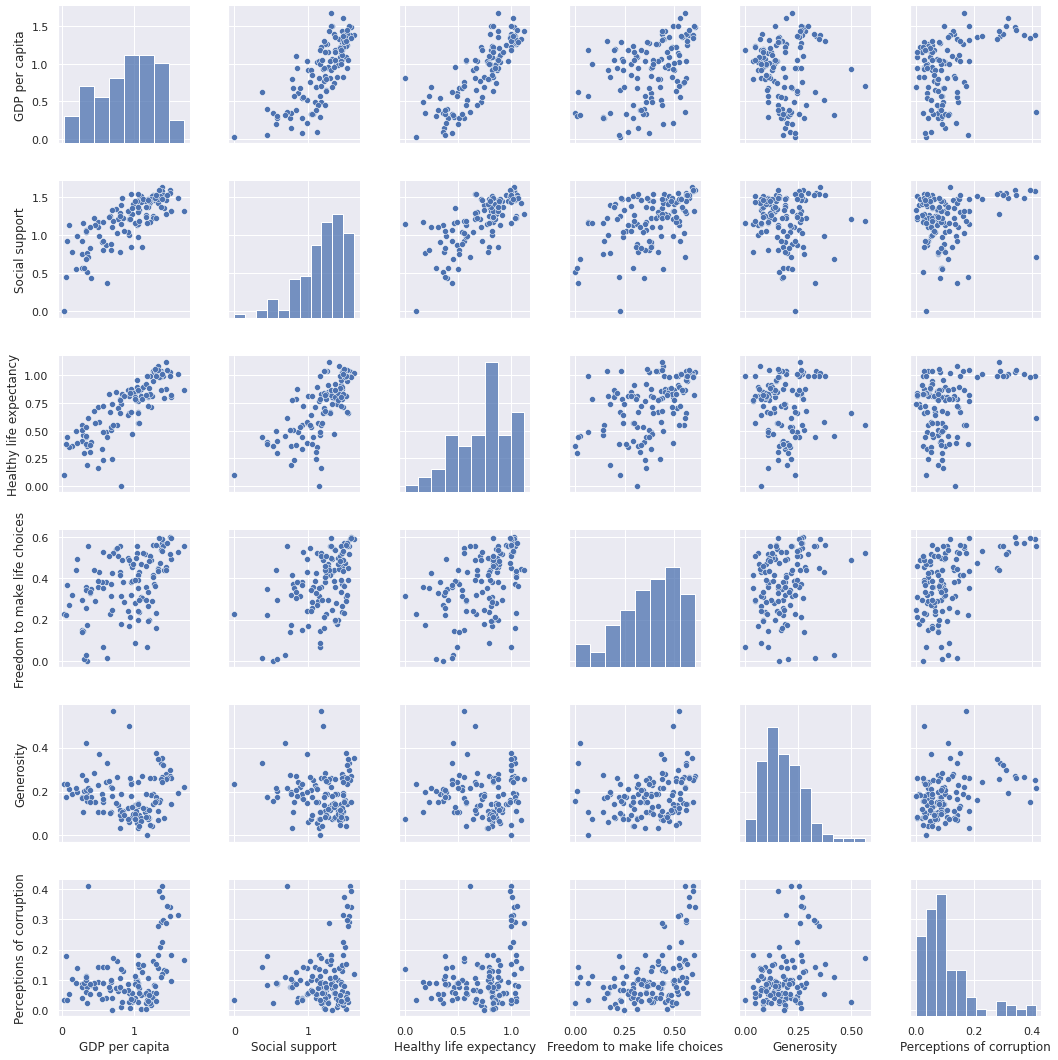

In [74]:
# check to see what our training data looks like
train_df = pd.DataFrame(X_train,columns= class_names)
train_df['MEDV'] = Y_train
sns.pairplot(train_df, vars = class_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlation matrix between the independent and dependent variable')

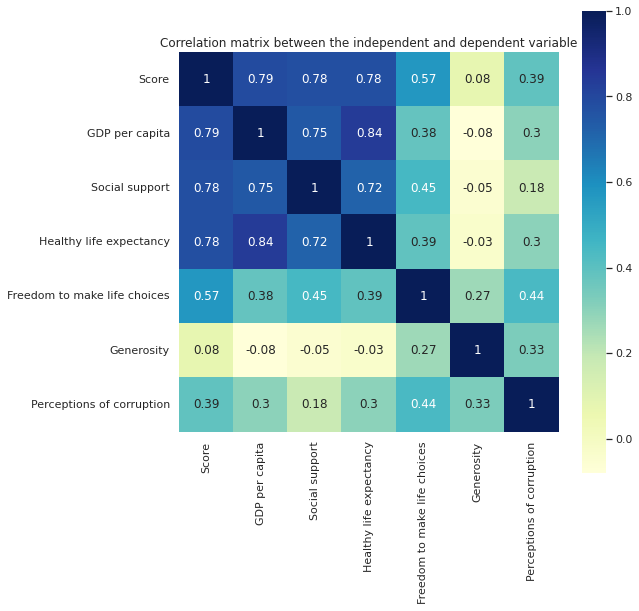

In [75]:
# correlation matrix between the independent variable
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df.corr().round(2), square=True, cmap='YlGnBu', annot=True)
ax = plt.axes()
ax.set_title('Correlation matrix between the independent and dependent variable')



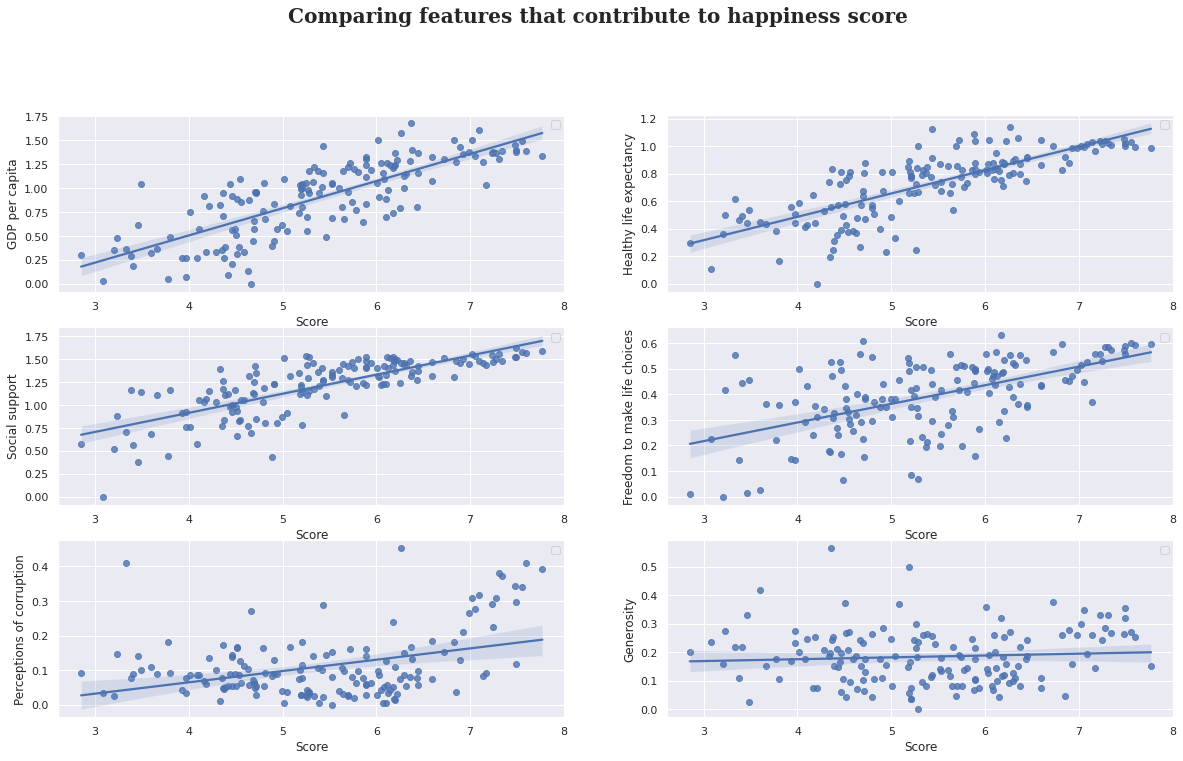

In [76]:
#  what are the fields that contribute most to higher happiness score
cols=df.corr()['Score'].sort_values(ascending=False)
fig=plt.figure(figsize=(20,15))
plt.suptitle("Comparing features that contribute to happiness score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df, x='Score',y=i)
    ax.legend('')
    j=j+1
    
plt.legend('')

In [77]:
models=[LinearRegression(),
        RandomForestRegressor(),GradientBoostingRegressor()]

In [78]:
def create_model(model):
    mod=model
    mod.fit(X_train,Y_train)
    temp= mod.score(X_train,Y_train)

    pre=mod.predict(X_test)

    
    mean_absolute_err=mean_absolute_error(pre,Y_test)
    mean_square_err=mean_squared_error(pre,Y_test)
    root_mean_square_err=np.sqrt(mean_squared_error(pre,Y_test))
    cof_det=r2_score(Y_test,pre)

    print(mod)
    print("Score of the Model on training data: ", temp)
    print('Mean absolute error',mean_absolute_err)
    print('Mean squared error',mean_square_err)
    print('Root Mean squared error',root_mean_square_err)
    print('Coefficient of determination:',cof_det)
    print()


In [79]:
for i in models:
    create_model(i)

LinearRegression()
Score of the Model on training data:  1.0
Mean absolute error 2.3037127760972e-15
Mean squared error 6.582058177937817e-30
Root Mean squared error 2.5655522169579433e-15
Coefficient of determination: 1.0

RandomForestRegressor()
Score of the Model on training data:  0.9995937875192347
Mean absolute error 0.028754375
Mean squared error 0.0016603634687499824
Root Mean squared error 0.04074755782559223
Coefficient of determination: 0.9985978616372247

GradientBoostingRegressor()
Score of the Model on training data:  0.9999979170109737
Mean absolute error 0.018532246805825395
Mean squared error 0.0005260629819864426
Root Mean squared error 0.022936062913814188
Coefficient of determination: 0.9995557520373328



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

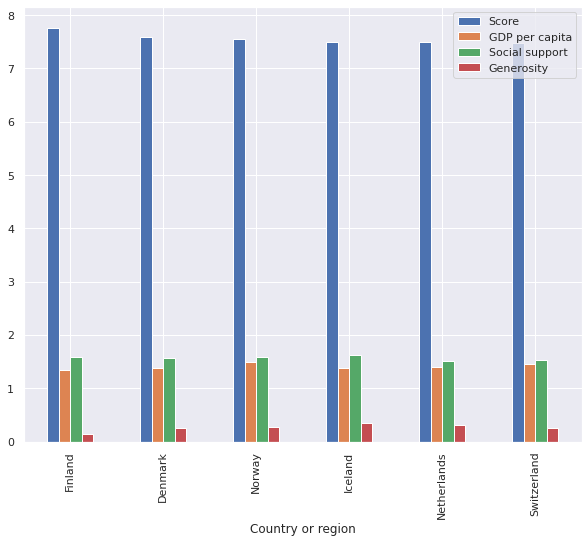

In [80]:
# Showing top countries with highest happiness score
comp=df[df['Score'] >= 7.4]
comp.plot(x='Country or region', y=['Score','GDP per capita', 'Social support','Generosity'], kind="bar",figsize=(10,8))
plt.xticks(rotation='vertical')

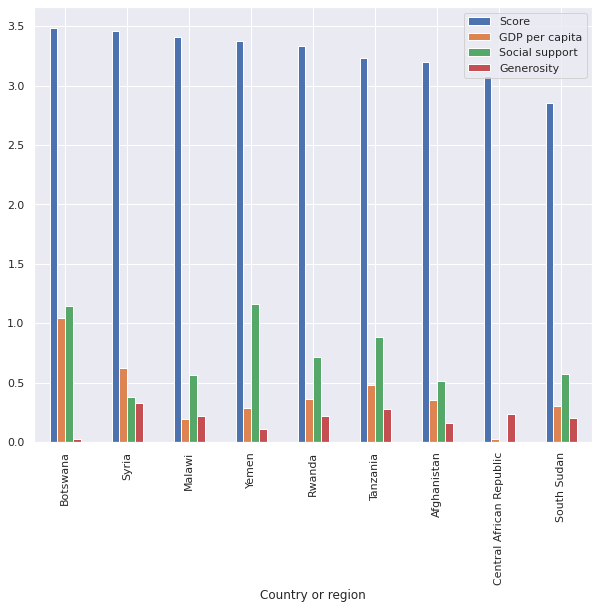

In [81]:
# Showing top countries with lowest happiness score
comp=df[df['Score'] <= 3.5]
comp.plot(x='Country or region', y=['Score','GDP per capita', 'Social support','Generosity'], kind="bar",figsize=(10,8))


In [82]:
# Cross-validation results

from sklearn.model_selection import cross_validate

def create_mod(model):
    mod=model
    mod.fit(X_train,Y_train)
    cv_results = cross_validate(model, X_train, Y_train, cv=7)
    print(mod)
    print("Accurcies of 7 splits are: ")
    print(cv_results['test_score'])
    print("Mean accuracy: "+str(cv_results['test_score'].mean()))
    print()

for i in models:
    create_mod(i)

LinearRegression()
Accurcies of 7 splits are: 
[1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0

RandomForestRegressor()
Accurcies of 7 splits are: 
[1.   1.   0.98 1.   1.   1.   1.  ]
Mean accuracy: 0.9960035456679949

GradientBoostingRegressor()
Accurcies of 7 splits are: 
[1.   1.   0.99 1.   1.   1.   1.  ]
Mean accuracy: 0.9979077384378103

